In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.polynomial.polynomial import polyval2d
from scipy.stats import multivariate_normal
from astropy.visualization import ZScaleInterval
interval = ZScaleInterval()
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
def compute_grid(x_len, y_len):
    x = np.arange(- x_len // 2 + 1, x_len // 2 + 1, 1)
    y = np.arange(- y_len // 2 + 1, y_len // 2 + 1, 1)
    xx, yy = np.meshgrid(x, y)
    grid = np.dstack((xx, yy))
    return grid

def compute_gaussian2d(grid, m=[0., 0.], cov=[[1, 0], [0, 1]]):
    var = multivariate_normal(mean=m, cov=cov)
    return var.pdf(grid)

In [ ]:
gau = compute_gaussian2d(grid, m=[0., 0.], cov=[[, 0], [0, 1]])

In [3]:


def compute_phi(ds, theta, sx=1, sy=1, x_len=15, y_len=13):
    x = np.arange(- x_len // 2 + 1, x_len // 2 + 1, 0.1)
    y = np.arange(- y_len // 2 + 1, y_len // 2 + 1, 0.1)
    xx, yy = np.meshgrid(x, y)
    grid = np.dstack((xx, yy))
    # compute delta sigma_x, delta sigma_y
    dsx = ds * np.cos(np.deg2rad(theta))
    dsy = ds * np.sin(np.deg2rad(theta))
    # compute coefficients
    c00 = (- 1 / sx * dsx  - 1 / sy * dsy)
    c02 = 1 / sy**3 * dsy
    c20 = 1 / sx**3 * dsx
    poly = polyval2d(xx, yy, c=[[c00, 0, c02], [0,0,0], [c20, 0, 0]])
    gau2d = compute_gaussian2d(grid, cov=[[sx, 0], [0, sy]])
    phi = poly * gau2d
    return phi

def plot_phi(ax, ds=1, theta=0, sx=1, sy=1, x_len=15, y_len=13):
    phi = compute_phi(ds=ds, theta=theta, sx=sx, sy=sy, x_len=x_len, y_len=y_len)
    im = ax.imshow(phi,cmap='gray', origin='lower')
    ax.set_title(f'$\\phi = {theta}$')
    ax.set_axis_off()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')


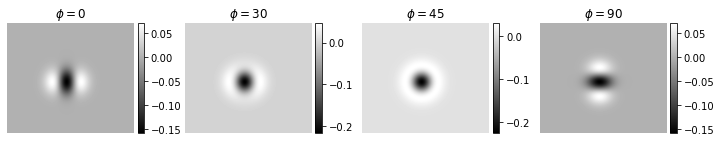

In [8]:
fig, ax = plt.subplots(1, 4, figsize=(12,8))
fig.subplots_adjust(wspace=0.3)
plot_phi(ax[0], theta=0)
plot_phi(ax[1], theta=30)
plot_phi(ax[2], theta=45)
plot_phi(ax[3], theta=90)
plt.savefig('phi.pdf')

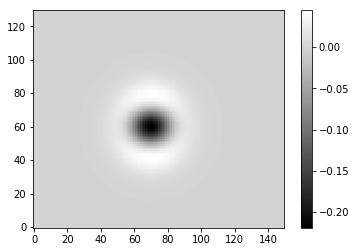

In [4]:
phi = compute_phi(ds=1, theta=45, sx=1, sy=1, x_len=15, y_len=13)
plt.imshow(phi, cmap='gray', origin='lower')
plt.colorbar()set_title

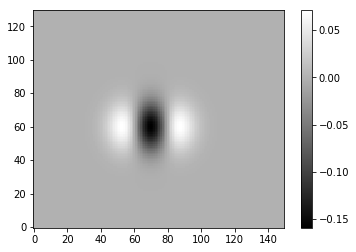

In [5]:
phi = compute_phi(ds=1, theta=0, sx=1, sy=1, x_len=15, y_len=13)
plt.imshow(phi, cmap='gray', origin='lower')
plt.colorbar()

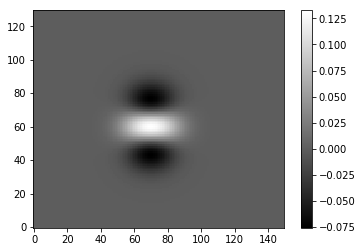

In [6]:
phi = compute_phi(ds=1, theta=30, sx=1, sy=1, x_len=15, y_len=13)
plt.imshow(phi, cmap='gray', origin='lower')
plt.colorbar()

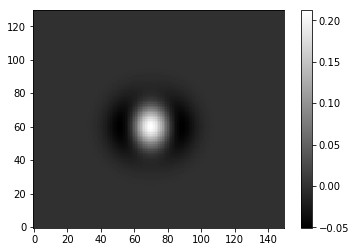

In [18]:
phi = compute_phi(ds=1, theta=35, sx=1, sy=1, x_len=15, y_len=13)
plt.imshow(phi, cmap='gray', origin='lower')
plt.colorbar()

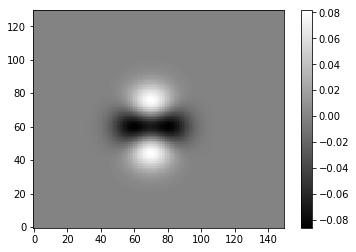

In [35]:
phi = compute_phi(ds=1, theta=90, sx=1, sy=1, x_len=15, y_len=13)
plt.imshow(phi, cmap='gray', origin='lower')
plt.colorbar()